## Pillow

### Supported formats
https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html

In [1]:
from PIL import Image

In [2]:
image = Image.open('orange.jpeg')

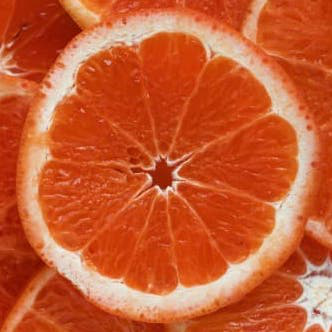

In [3]:
image

### File does not exist or can not be opened

In [4]:
try:
    bad_image = Image.open('image_that_doesnt_exist.jpg')
except OSError as error:
    print(f'Caught: [{error}]')
    pass

Caught: [[Errno 2] No such file or directory: 'image_that_doesnt_exist.jpg']


In [5]:
try:
    bad_image = Image.open('unsupported_file_extension.txt')
except OSError as error:
    print(f'Caught: [{error}]')
    pass

Caught: [cannot identify image file 'unsupported_file_extension.txt']


### Image attributes

In [6]:
print(image.format, image.size, image.mode, sep='    |    ')

JPEG    |    (332, 332)    |    RGB


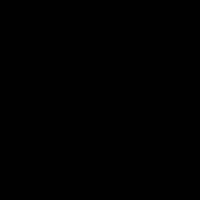

In [7]:
created_image = Image.new(mode = 'RGB', size = (200, 200))
created_image

In [8]:
print(created_image.format)

None


### Show

In [9]:
image.show()

### Save

In [10]:
image.save('orange.png')

### Crop

In [11]:
box = (0, 0, 100, 100)
region = image.crop(box)

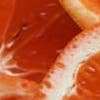

In [12]:
region

In [13]:
box = (-100, -100, 440, 440)
region = image.crop(box)

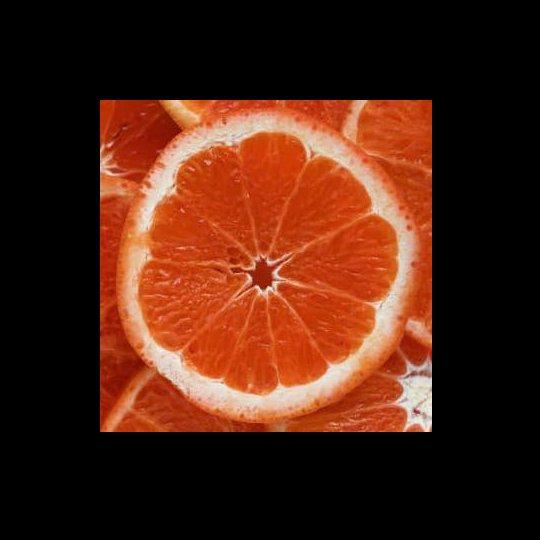

In [14]:
region

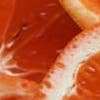

In [15]:
box = (0, 0, 100, 100)
region = image.crop(box)
region

In [16]:
region = region.transpose(Image.ROTATE_180)
image.paste(region, box)

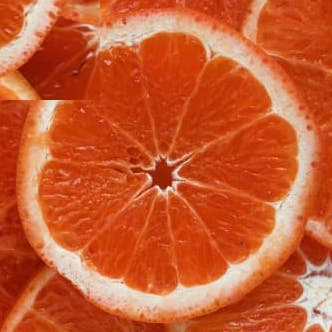

In [17]:
image

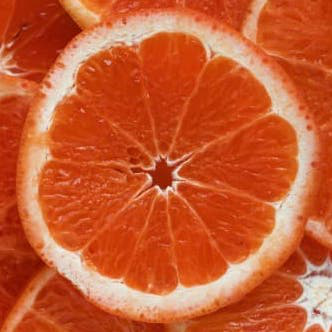

In [18]:
region = region.transpose(Image.ROTATE_180)
image.paste(region, box)
image

In [19]:
region = region.transpose(Image.ROTATE_180)

try:
    image.paste(region, (-100,-100,100,100))
except ValueError as error:
    print(f'Caught: [{error}]')

Caught: [images do not match]


### Split & merge

In [20]:
r, g, b = image.split()

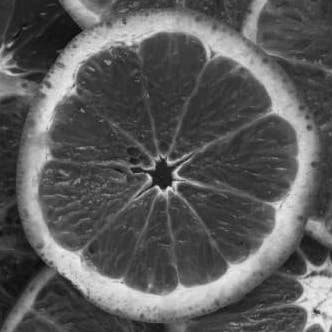

In [21]:
g

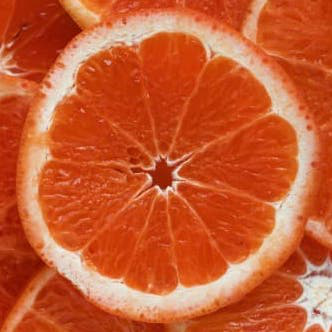

In [22]:
image = Image.merge("RGB", (r, g, b))
image

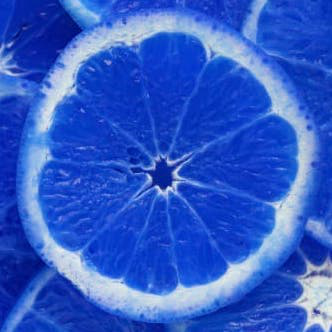

In [23]:
blue_image = Image.merge("RGB", (b, g, r))
blue_image

### Resize & rotate

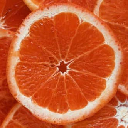

In [24]:
output_image = image.resize((128, 128))
output_image

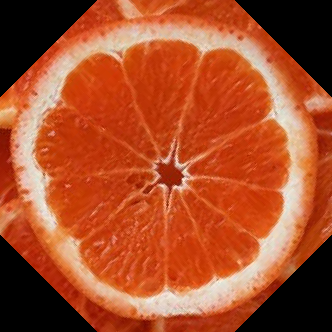

In [25]:
output_image = image.rotate(45)
output_image

### Convert

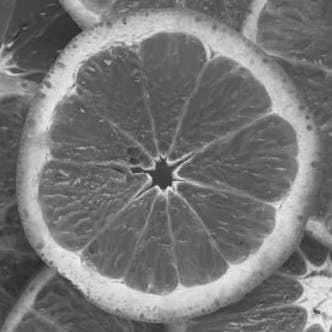

In [26]:
converted_image = image.convert('L')
converted_image

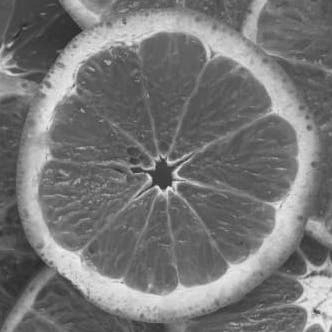

In [27]:
converted_image_2 = converted_image.convert('RGB')
converted_image_2

In [28]:
print(converted_image.mode)
print(converted_image_2.mode)

L
RGB


### Filters

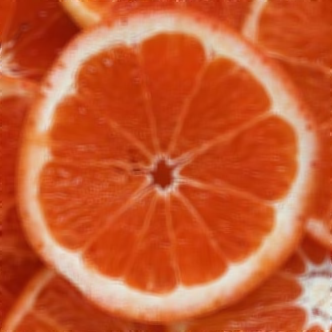

In [29]:
from PIL import ImageFilter
output_image = image.filter(ImageFilter.BLUR)
output_image

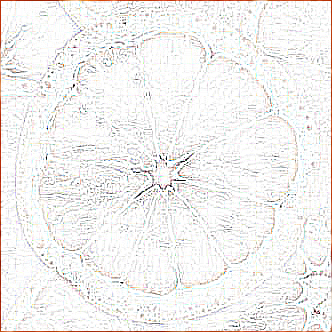

In [30]:
output_image = image.filter(ImageFilter.CONTOUR)
output_image

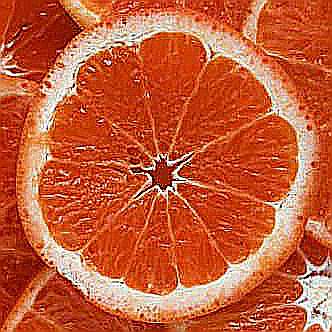

In [31]:
output_image = image.filter(ImageFilter.EDGE_ENHANCE_MORE)
output_image

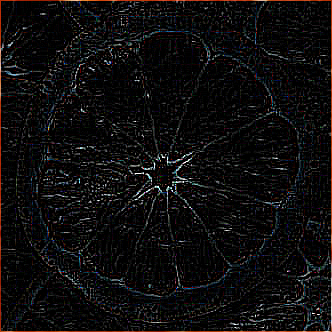

In [32]:
output_image = image.filter(ImageFilter.FIND_EDGES)
output_image

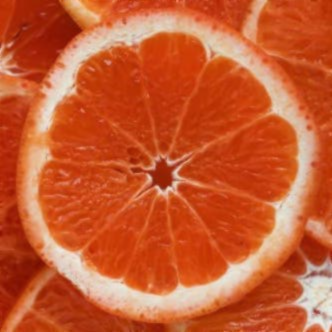

In [33]:
output_image = image.filter(ImageFilter.SMOOTH_MORE)
output_image

All avalible filters - https://pillow.readthedocs.io/en/latest/reference/ImageFilter.html#module-PIL.ImageFilter

### Point

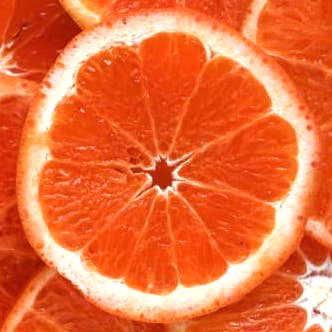

In [34]:
output_image = image.point(lambda i: i * 1.2)
output_image

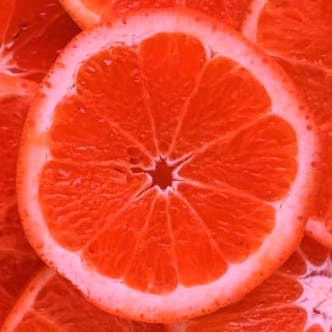

In [35]:
r,g,b = image.split()
r = r.point(lambda i: i * 1.2)
g = g.point(lambda i: i * 0.8)
output_image = Image.merge(image.mode, (r,g,b))
output_image

### Enhancement

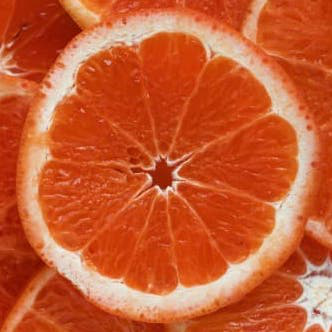

In [36]:
image

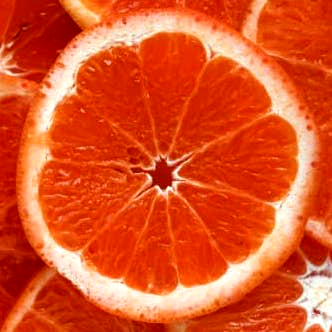

In [37]:
from PIL import ImageEnhance

enhanced_image = ImageEnhance.Contrast(image)
enhanced_image.enhance(1.3)

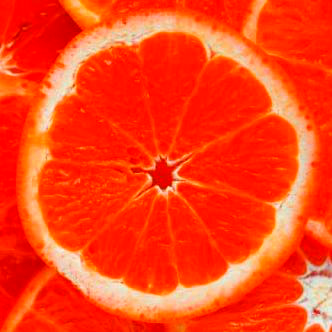

In [38]:
enhanced_image = ImageEnhance.Color(image)
enhanced_image.enhance(2)

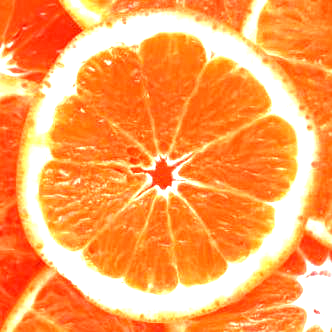

In [39]:
enhanced_image = ImageEnhance.Brightness(image)
enhanced_image.enhance(2)

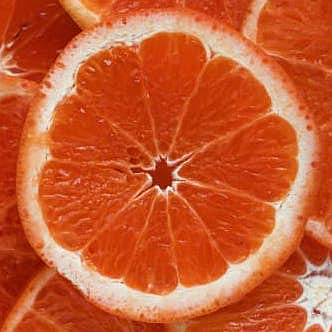

In [40]:
enhanced_image = ImageEnhance.Sharpness(image)
enhanced_image.enhance(2)

### Image sequences

In [41]:
with Image.open('earth.gif') as gif:
    print(gif.n_frames)
    print(gif.tell())
    
    gif.seek(1)
    
    print(gif.tell())

    try:
        while True:
            gif.seek(gif.tell() + 1)
    except EOFError:
        print('End of file')
        pass

44
0
1
End of file


In [42]:
from PIL import ImageSequence

with Image.open('earth.gif') as gif:
    for frame in ImageSequence.Iterator(gif):
        print(frame.tell())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
